In [1]:
# Objective: Predict the department-wide sales for each store
# Method Used: Linear Regression, Decision Tree, Random Forest Regressor

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from scipy import stats
import seaborn as sns

In [3]:
train=pd.read_csv('C:/Users/Lenovo/Desktop/2. Walmart Store Sales Forecasting/data/train.csv')
features=pd.read_csv('C:/Users/Lenovo/Desktop/2. Walmart Store Sales Forecasting/data/features.csv')
stores=pd.read_csv('C:/Users/Lenovo/Desktop/2. Walmart Store Sales Forecasting/data/stores.csv')
test=pd.read_csv('C:/Users/Lenovo/Desktop/2. Walmart Store Sales Forecasting/data/test.csv')

In [4]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
data=pd.merge(left=train,right=features,how='left',on=['Store','Date','IsHoliday'])
data.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [8]:
data=pd.merge(left=data,right=stores,how='left',on='Store')
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [10]:
data.Date=pd.to_datetime(data.Date,format='%Y-%m-%d')

In [11]:
#Combining Store and Dept to create a unique identifier for each combination
store_dept=[]
for x in range(0,len(data)):
    store_dept.append(str(data.Store[x])+'_'+str(data.Dept[x]))

In [12]:
data['Store_Dept']=pd.Series(store_dept)
data.drop(['Store','Dept'],axis=1,inplace=True)

In [13]:
#Creating derived variables

In [14]:
#year,month,quarter,week

In [15]:
year=[]
month=[]
quarter=[]
week=[]
for x in range(0,len(data)):
    year.append(data.Date[x].year)
    month.append(data.Date[x].month)
    quarter.append(data.Date[x].quarter)
    week.append(data.Date[x].weekofyear)

In [16]:
data['Year']=pd.Series(year)
data['Month']=pd.Series(month)
data['Quarter']=pd.Series(quarter)
data['Week']=pd.Series(week)
data.drop(['Date'],axis=1,inplace=True)

In [17]:
#Superbowl (Feb), Laborday(Sep), Thanksgiving(Nov), Christmas(Dec) 

In [18]:
superbowl=[0]*len(data)
laborday=[0]*len(data)
thanksgiving=[0]*len(data)
christmas=[0]*len(data)
for x in range(0,len(data)):
    if(data.IsHoliday[x]==True):
        if(data.Month[x]==2):
            superbowl[x]=1
        elif(data.Month[x]==9):
            laborday[x]=1
        elif(data.Month[x]==11):
            thanksgiving[x]=1
        elif(data.Month[x]==12):
            christmas[x]=1

In [19]:
data['Super_Bowl']=pd.Series(superbowl)
data['Labor_Day']=pd.Series(laborday)
data['Thanksgiving']=pd.Series(thanksgiving)
data['Christmas']=pd.Series(christmas)

In [20]:
data.drop(['IsHoliday'],axis=1,inplace=True)

In [21]:
data=data[['Store_Dept','Year', 'Month', 'Quarter', 'Week','Super_Bowl', 'Labor_Day',
       'Thanksgiving', 'Christmas','Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type',
       'Size','Weekly_Sales']]

In [22]:
for col in data.select_dtypes(['int64','float64']):
    for x in range(0,len(data)):
        if(data[col][x]<0):
            data[col][x]=np.nan

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [23]:
#Missing value imputation
data.Weekly_Sales=data.Weekly_Sales.fillna(data.Weekly_Sales.mean())
data.Temperature=data.Temperature.fillna(data.Temperature.mean())

In [24]:
#Max_WeeklySales_by_Store_Dept
#Min_WeeklySales_by_Store_Dept
#Avg_WeeklySales_by_Store_Dept
#Median_WeeklySales_by_Store_Dept
#Std_WeeklySales_by_Store_Dept

In [25]:
max_weekly_sales=data.groupby(['Store_Dept']).Weekly_Sales.max().reset_index()
max_weekly_sales.columns=['Store_Dept','Max_Weekly_Sales']
min_weekly_sales=data.groupby(['Store_Dept']).Weekly_Sales.min().reset_index()
min_weekly_sales.columns=['Store_Dept','Min_Weekly_Sales']
avg_weekly_sales=data.groupby(['Store_Dept']).Weekly_Sales.mean().reset_index()
avg_weekly_sales.columns=['Store_Dept','Avg_Weekly_Sales']
median_weekly_sales=data.groupby(['Store_Dept']).Weekly_Sales.median().reset_index()
median_weekly_sales.columns=['Store_Dept','Median_Weekly_Sales']
std_weekly_sales=data.groupby(['Store_Dept']).Weekly_Sales.std().reset_index()
std_weekly_sales.columns=['Store_Dept','Std_Weekly_Sales']

In [26]:
sales_stat_df=pd.concat([max_weekly_sales,min_weekly_sales,avg_weekly_sales,
                         median_weekly_sales,std_weekly_sales],axis=1)
sales_stat_df=sales_stat_df.loc[:,~sales_stat_df.columns.duplicated()]
sales_stat_df.head()

,Store_Dept,Max_Weekly_Sales,Min_Weekly_Sales,Avg_Weekly_Sales,Median_Weekly_Sales,Std_Weekly_Sales
0,10_1,140537.20,23444.71,39925.138951,30345.61,23688.629825
1,10_10,57258.38,35856.67,48108.063497,48221.99,4216.482766
2,10_11,55009.94,23483.55,32911.815385,31934.99,5631.067597
3,10_12,11797.58,5876.51,9243.158531,9194.33,1157.381726
4,10_13,74020.63,53864.29,62799.067483,62829.41,4055.654987


In [27]:
data=pd.merge(data,sales_stat_df,how='left',on=['Store_Dept'])

In [28]:
#Dummy Variable Creation
dummy_df=pd.get_dummies(data.Type,prefix='Type',drop_first=True)
data=pd.concat([data,dummy_df],axis=1)
data.drop(['Type'],axis=1,inplace=True)

In [29]:
data.isna().sum()

Store_Dept                  0
Year                        0
Month                       0
Quarter                     0
Week                        0
Super_Bowl                  0
Labor_Day                   0
Thanksgiving                0
Christmas                   0
Temperature                 0
Fuel_Price                  0
MarkDown1              270889
MarkDown2              311633
MarkDown3              284736
MarkDown4              286603
MarkDown5              270138
CPI                         0
Unemployment                0
Size                        0
Weekly_Sales                0
Max_Weekly_Sales            0
Min_Weekly_Sales            0
Avg_Weekly_Sales            0
Median_Weekly_Sales         0
Std_Weekly_Sales           37
Type_B                      0
Type_C                      0
dtype: int64

In [30]:
#Missing Value Imputation
data.Std_Weekly_Sales=data.Std_Weekly_Sales.fillna(data.Std_Weekly_Sales.mean())
data.MarkDown1=data.MarkDown1.fillna(0)
data.MarkDown2=data.MarkDown2.fillna(0)
data.MarkDown3=data.MarkDown3.fillna(0)
data.MarkDown4=data.MarkDown4.fillna(0)
data.MarkDown5=data.MarkDown5.fillna(0)

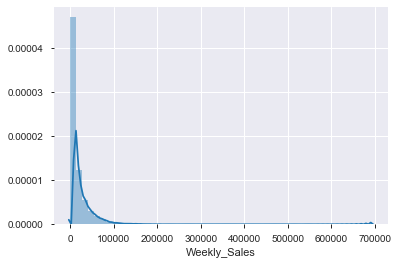

In [31]:
sns.distplot(data.Weekly_Sales)
plt.show()

In [32]:
#Transforming Dependent Variable For Gaussian Distribution
data['ln_weekly_sales']=np.log(1+data.Weekly_Sales)
train_y=data.Weekly_Sales
data.drop(['Weekly_Sales'],axis=1,inplace=True)

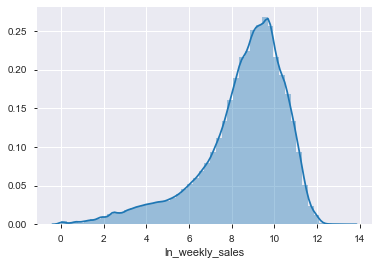

In [33]:
sns.distplot(data.ln_weekly_sales)
plt.show()

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 27 columns):
Store_Dept             421570 non-null object
Year                   421570 non-null int64
Month                  421570 non-null int64
Quarter                421570 non-null int64
Week                   421570 non-null int64
Super_Bowl             421570 non-null int64
Labor_Day              421570 non-null int64
Thanksgiving           421570 non-null int64
Christmas              421570 non-null int64
Temperature            421570 non-null float64
Fuel_Price             421570 non-null float64
MarkDown1              421570 non-null float64
MarkDown2              421570 non-null float64
MarkDown3              421570 non-null float64
MarkDown4              421570 non-null float64
MarkDown5              421570 non-null float64
CPI                    421570 non-null float64
Unemployment           421570 non-null float64
Size                   421570 non-null int64
Max_Weekly_Sale

In [35]:
#Preparing the test dataset

In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
Store        115064 non-null int64
Dept         115064 non-null int64
Date         115064 non-null object
IsHoliday    115064 non-null bool
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [37]:
test=pd.merge(left=test,right=features,how='left',on=['Store','Date','IsHoliday'])

In [38]:
test=pd.merge(left=test,right=stores,how='left',on='Store')

In [39]:
test.Date=pd.to_datetime(test.Date,format='%Y-%m-%d')

In [40]:
#Combining Store and Dept to create a unique identifier for each combination
store_dept=[]
for x in range(0,len(test)):
    store_dept.append(str(test.Store[x])+'_'+str(test.Dept[x]))

In [41]:
test['Store_Dept']=pd.Series(store_dept)
test.drop(['Store','Dept'],axis=1,inplace=True)

In [42]:
#Creating derived variables

In [43]:
#year,month,quarter,week

In [44]:
year=[]
month=[]
quarter=[]
week=[]
for x in range(0,len(test)):
    year.append(test.Date[x].year)
    month.append(test.Date[x].month)
    quarter.append(test.Date[x].quarter)
    week.append(test.Date[x].weekofyear)

In [45]:
test['Year']=pd.Series(year)
test['Month']=pd.Series(month)
test['Quarter']=pd.Series(quarter)
test['Week']=pd.Series(week)
test.drop(['Date'],axis=1,inplace=True)

In [46]:
#Superbowl (Feb), Laborday(Sep), Thanksgiving(Nov), Christmas(Dec) 

In [47]:
superbowl=[0]*len(test)
laborday=[0]*len(test)
thanksgiving=[0]*len(test)
christmas=[0]*len(test)
for x in range(0,len(test)):
    if(test.IsHoliday[x]==True):
        if(test.Month[x]==2):
            superbowl[x]=1
        elif(test.Month[x]==9):
            laborday[x]=1
        elif(test.Month[x]==11):
            thanksgiving[x]=1
        elif(test.Month[x]==12):
            christmas[x]=1

In [48]:
test['Super_Bowl']=pd.Series(superbowl)
test['Labor_Day']=pd.Series(laborday)
test['Thanksgiving']=pd.Series(thanksgiving)
test['Christmas']=pd.Series(christmas)

In [49]:
test.drop(['IsHoliday'],axis=1,inplace=True)

In [50]:
test=test[['Store_Dept','Year', 'Month', 'Quarter', 'Week','Super_Bowl', 'Labor_Day',
       'Thanksgiving', 'Christmas','Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type',
       'Size']]

In [51]:
for col in test.select_dtypes(['int64','float64']):
    for x in range(0,len(test)):
        if(test[col][x]<0):
            test[col][x]=np.nan

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [52]:
test=pd.merge(test,sales_stat_df,how='left',on=['Store_Dept'])

In [53]:
#Missing value imputation
for x in test[['Temperature','CPI','Unemployment','Max_Weekly_Sales','Min_Weekly_Sales',
               'Avg_Weekly_Sales','Median_Weekly_Sales','Std_Weekly_Sales']]:
    test[x]=test[x].fillna(test[x].mean())

In [54]:
#Dummy Variable Creation
dummy_df=pd.get_dummies(test.Type,prefix='Type',drop_first=True)
test=pd.concat([test,dummy_df],axis=1)

In [55]:
test.drop(['Type'],axis=1,inplace=True)

In [56]:
test.MarkDown1=test.MarkDown1.fillna(0)
test.MarkDown2=test.MarkDown2.fillna(0)
test.MarkDown3=test.MarkDown3.fillna(0)
test.MarkDown4=test.MarkDown4.fillna(0)
test.MarkDown5=test.MarkDown5.fillna(0)

In [57]:
store_dept_without_train_data=set(test.Store_Dept).difference(set(data.Store_Dept))
store_dept_without_train_data

{'10_99',
 '18_43',
 '24_43',
 '25_99',
 '34_39',
 '36_30',
 '37_29',
 '42_30',
 '45_39',
 '5_99',
 '9_99'}

In [58]:
for store_dept in store_dept_without_train_data:
    test.drop(test[test.Store_Dept==store_dept].index,inplace=True)

### Linear Regression

In [59]:
lm=LinearRegression(n_jobs=-1)

In [60]:
lm.fit(data[data.columns[0:-1]],data.ln_weekly_sales)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [61]:
train_pred=np.exp(lm.predict(data[data.columns[0:-1]]))-1

In [62]:
test_pred=np.exp(lm.predict(test))-1

In [63]:
train_pred=pd.Series(train_pred)

In [64]:
print('RMSE: ',np.sqrt(metrics.mean_squared_error(train_y,train_pred)))
absolute_percentage_error=np.abs((train_y-train_pred)/train_y).replace(np.inf,0)
print('MAPE: ',np.mean(absolute_percentage_error))
print('Correlation: ',stats.stats.pearsonr(train_y,train_pred))

RMSE:  6162826.1125701815
MAPE:  55.86142122694128
Correlation:  (0.23450312300969686, 0.0)


In [65]:
#Decile Analysis for Train -for validation of model (Business Validation)
data['Weekly_Sales']=train_y
data['Pred']=train_pred
data['Deciles']=pd.qcut(data['Pred'],10,labels=False)
predicted=data[['Deciles','Pred']].groupby(['Deciles']).Pred.mean().sort_values(ascending=False)
#predicted
actual=data[['Deciles','Weekly_Sales']].groupby(['Deciles']).Weekly_Sales.mean().sort_values(ascending=False)
#actual
train_decile_analysis=pd.concat([predicted,actual],axis=1).sort_index(ascending=False)
train_decile_analysis

,Pred,Weekly_Sales
Deciles,,
9,2.216969e+06,66490.312178
8,1.664509e+04,31958.381864
7,8.152267e+03,20582.620990
6,5.459814e+03,13322.088512
5,4.103114e+03,8987.562718
4,3.325221e+03,6240.884082
3,2.796211e+03,4500.772500
2,2.329741e+03,3137.022875
1,1.787599e+03,3213.365883


### Decision Tree

In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [77]:
pGrid={'max_depth':range(1,12),'min_samples_split':range(8,19)}

In [78]:
gscv_dec=GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=pGrid,verbose=10,cv=5)

In [79]:
gscv_dec.fit(data[data.columns[0:26]],train_y)

Fitting 5 folds for each of 121 candidates, totalling 605 fits
[CV] max_depth=1, min_samples_split=8 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... max_depth=1, min_samples_split=8, score=0.610, total=   1.6s
[CV] max_depth=1, min_samples_split=8 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] .... max_depth=1, min_samples_split=8, score=0.565, total=   1.4s
[CV] max_depth=1, min_samples_split=8 ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


[CV] .... max_depth=1, min_samples_split=8, score=0.564, total=   1.4s
[CV] max_depth=1, min_samples_split=8 ................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.3s remaining:    0.0s


[CV] .... max_depth=1, min_samples_split=8, score=0.608, total=   1.4s
[CV] max_depth=1, min_samples_split=8 ................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.8s remaining:    0.0s


[CV] .... max_depth=1, min_samples_split=8, score=0.586, total=   1.3s
[CV] max_depth=1, min_samples_split=9 ................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.1s remaining:    0.0s


[CV] .... max_depth=1, min_samples_split=9, score=0.610, total=   1.4s
[CV] max_depth=1, min_samples_split=9 ................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.5s remaining:    0.0s


[CV] .... max_depth=1, min_samples_split=9, score=0.565, total=   1.6s
[CV] max_depth=1, min_samples_split=9 ................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   10.1s remaining:    0.0s


[CV] .... max_depth=1, min_samples_split=9, score=0.564, total=   1.4s
[CV] max_depth=1, min_samples_split=9 ................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   11.5s remaining:    0.0s


[CV] .... max_depth=1, min_samples_split=9, score=0.608, total=   1.5s
[CV] max_depth=1, min_samples_split=9 ................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   13.0s remaining:    0.0s


[CV] .... max_depth=1, min_samples_split=9, score=0.586, total=   1.4s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV] ... max_depth=1, min_samples_split=10, score=0.610, total=   1.4s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV] ... max_depth=1, min_samples_split=10, score=0.565, total=   1.4s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV] ... max_depth=1, min_samples_split=10, score=0.564, total=   1.4s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV] ... max_depth=1, min_samples_split=10, score=0.608, total=   1.3s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV] ... max_depth=1, min_samples_split=10, score=0.586, total=   1.4s
[CV] max_depth=1, min_samples_split=11 ...............................
[CV] ... max_depth=1, min_samples_split=11, score=0.610, total=   1.3s
[CV] max_depth=1, min_samples_split=11 ...............................
[CV] .

[CV] ... max_depth=2, min_samples_split=10, score=0.786, total=   1.8s
[CV] max_depth=2, min_samples_split=10 ...............................
[CV] ... max_depth=2, min_samples_split=10, score=0.825, total=   1.7s
[CV] max_depth=2, min_samples_split=10 ...............................
[CV] ... max_depth=2, min_samples_split=10, score=0.807, total=   1.7s
[CV] max_depth=2, min_samples_split=11 ...............................
[CV] ... max_depth=2, min_samples_split=11, score=0.826, total=   1.7s
[CV] max_depth=2, min_samples_split=11 ...............................
[CV] ... max_depth=2, min_samples_split=11, score=0.775, total=   1.8s
[CV] max_depth=2, min_samples_split=11 ...............................
[CV] ... max_depth=2, min_samples_split=11, score=0.786, total=   1.7s
[CV] max_depth=2, min_samples_split=11 ...............................
[CV] ... max_depth=2, min_samples_split=11, score=0.825, total=   1.7s
[CV] max_depth=2, min_samples_split=11 ...............................
[CV] .

[CV] ... max_depth=3, min_samples_split=11, score=0.908, total=   2.1s
[CV] max_depth=3, min_samples_split=11 ...............................
[CV] ... max_depth=3, min_samples_split=11, score=0.853, total=   2.2s
[CV] max_depth=3, min_samples_split=11 ...............................
[CV] ... max_depth=3, min_samples_split=11, score=0.854, total=   2.2s
[CV] max_depth=3, min_samples_split=11 ...............................
[CV] ... max_depth=3, min_samples_split=11, score=0.890, total=   2.2s
[CV] max_depth=3, min_samples_split=11 ...............................
[CV] ... max_depth=3, min_samples_split=11, score=0.877, total=   2.1s
[CV] max_depth=3, min_samples_split=12 ...............................
[CV] ... max_depth=3, min_samples_split=12, score=0.908, total=   2.1s
[CV] max_depth=3, min_samples_split=12 ...............................
[CV] ... max_depth=3, min_samples_split=12, score=0.853, total=   2.1s
[CV] max_depth=3, min_samples_split=12 ...............................
[CV] .

[CV] ... max_depth=4, min_samples_split=11, score=0.907, total=   2.6s
[CV] max_depth=4, min_samples_split=11 ...............................
[CV] ... max_depth=4, min_samples_split=11, score=0.898, total=   2.5s
[CV] max_depth=4, min_samples_split=12 ...............................
[CV] ... max_depth=4, min_samples_split=12, score=0.924, total=   2.4s
[CV] max_depth=4, min_samples_split=12 ...............................
[CV] ... max_depth=4, min_samples_split=12, score=0.873, total=   2.5s
[CV] max_depth=4, min_samples_split=12 ...............................
[CV] ... max_depth=4, min_samples_split=12, score=0.872, total=   2.5s
[CV] max_depth=4, min_samples_split=12 ...............................
[CV] ... max_depth=4, min_samples_split=12, score=0.907, total=   2.6s
[CV] max_depth=4, min_samples_split=12 ...............................
[CV] ... max_depth=4, min_samples_split=12, score=0.898, total=   2.6s
[CV] max_depth=4, min_samples_split=13 ...............................
[CV] .

[CV] ... max_depth=5, min_samples_split=12, score=0.878, total=   2.8s
[CV] max_depth=5, min_samples_split=12 ...............................
[CV] ... max_depth=5, min_samples_split=12, score=0.879, total=   3.1s
[CV] max_depth=5, min_samples_split=12 ...............................
[CV] ... max_depth=5, min_samples_split=12, score=0.911, total=   3.0s
[CV] max_depth=5, min_samples_split=12 ...............................
[CV] ... max_depth=5, min_samples_split=12, score=0.900, total=   2.8s
[CV] max_depth=5, min_samples_split=13 ...............................
[CV] ... max_depth=5, min_samples_split=13, score=0.928, total=   2.8s
[CV] max_depth=5, min_samples_split=13 ...............................
[CV] ... max_depth=5, min_samples_split=13, score=0.878, total=   2.8s
[CV] max_depth=5, min_samples_split=13 ...............................
[CV] ... max_depth=5, min_samples_split=13, score=0.879, total=   2.8s
[CV] max_depth=5, min_samples_split=13 ...............................
[CV] .

[CV] ... max_depth=6, min_samples_split=12, score=0.916, total=   3.3s
[CV] max_depth=6, min_samples_split=13 ...............................
[CV] ... max_depth=6, min_samples_split=13, score=0.942, total=   3.2s
[CV] max_depth=6, min_samples_split=13 ...............................
[CV] ... max_depth=6, min_samples_split=13, score=0.882, total=   3.3s
[CV] max_depth=6, min_samples_split=13 ...............................
[CV] ... max_depth=6, min_samples_split=13, score=0.892, total=   3.1s
[CV] max_depth=6, min_samples_split=13 ...............................
[CV] ... max_depth=6, min_samples_split=13, score=0.924, total=   3.2s
[CV] max_depth=6, min_samples_split=13 ...............................
[CV] ... max_depth=6, min_samples_split=13, score=0.916, total=   3.1s
[CV] max_depth=6, min_samples_split=14 ...............................
[CV] ... max_depth=6, min_samples_split=14, score=0.942, total=   3.2s
[CV] max_depth=6, min_samples_split=14 ...............................
[CV] .

[CV] ... max_depth=7, min_samples_split=13, score=0.901, total=   3.4s
[CV] max_depth=7, min_samples_split=13 ...............................
[CV] ... max_depth=7, min_samples_split=13, score=0.939, total=   3.7s
[CV] max_depth=7, min_samples_split=13 ...............................
[CV] ... max_depth=7, min_samples_split=13, score=0.925, total=   3.6s
[CV] max_depth=7, min_samples_split=14 ...............................
[CV] ... max_depth=7, min_samples_split=14, score=0.946, total=   3.5s
[CV] max_depth=7, min_samples_split=14 ...............................
[CV] ... max_depth=7, min_samples_split=14, score=0.886, total=   3.8s
[CV] max_depth=7, min_samples_split=14 ...............................
[CV] ... max_depth=7, min_samples_split=14, score=0.901, total=   3.7s
[CV] max_depth=7, min_samples_split=14 ...............................
[CV] ... max_depth=7, min_samples_split=14, score=0.939, total=   3.6s
[CV] max_depth=7, min_samples_split=14 ...............................
[CV] .

[CV] ... max_depth=8, min_samples_split=14, score=0.947, total=   4.0s
[CV] max_depth=8, min_samples_split=14 ...............................
[CV] ... max_depth=8, min_samples_split=14, score=0.887, total=   3.8s
[CV] max_depth=8, min_samples_split=14 ...............................
[CV] ... max_depth=8, min_samples_split=14, score=0.907, total=   4.1s
[CV] max_depth=8, min_samples_split=14 ...............................
[CV] ... max_depth=8, min_samples_split=14, score=0.940, total=   4.0s
[CV] max_depth=8, min_samples_split=14 ...............................
[CV] ... max_depth=8, min_samples_split=14, score=0.937, total=   3.7s
[CV] max_depth=8, min_samples_split=15 ...............................
[CV] ... max_depth=8, min_samples_split=15, score=0.949, total=   4.1s
[CV] max_depth=8, min_samples_split=15 ...............................
[CV] ... max_depth=8, min_samples_split=15, score=0.895, total=   3.9s
[CV] max_depth=8, min_samples_split=15 ...............................
[CV] .

[CV] ... max_depth=9, min_samples_split=14, score=0.940, total=   4.2s
[CV] max_depth=9, min_samples_split=14 ...............................
[CV] ... max_depth=9, min_samples_split=14, score=0.938, total=   4.1s
[CV] max_depth=9, min_samples_split=15 ...............................
[CV] ... max_depth=9, min_samples_split=15, score=0.950, total=   4.2s
[CV] max_depth=9, min_samples_split=15 ...............................
[CV] ... max_depth=9, min_samples_split=15, score=0.893, total=   4.1s
[CV] max_depth=9, min_samples_split=15 ...............................
[CV] ... max_depth=9, min_samples_split=15, score=0.914, total=   4.2s
[CV] max_depth=9, min_samples_split=15 ...............................
[CV] ... max_depth=9, min_samples_split=15, score=0.942, total=   4.2s
[CV] max_depth=9, min_samples_split=15 ...............................
[CV] ... max_depth=9, min_samples_split=15, score=0.939, total=   4.1s
[CV] max_depth=9, min_samples_split=16 ...............................
[CV] .

[CV] .. max_depth=10, min_samples_split=15, score=0.889, total=   4.5s
[CV] max_depth=10, min_samples_split=15 ..............................
[CV] .. max_depth=10, min_samples_split=15, score=0.917, total=   4.6s
[CV] max_depth=10, min_samples_split=15 ..............................
[CV] .. max_depth=10, min_samples_split=15, score=0.942, total=   4.5s
[CV] max_depth=10, min_samples_split=15 ..............................
[CV] .. max_depth=10, min_samples_split=15, score=0.941, total=   4.5s
[CV] max_depth=10, min_samples_split=16 ..............................
[CV] .. max_depth=10, min_samples_split=16, score=0.950, total=   4.7s
[CV] max_depth=10, min_samples_split=16 ..............................
[CV] .. max_depth=10, min_samples_split=16, score=0.889, total=   5.4s
[CV] max_depth=10, min_samples_split=16 ..............................
[CV] .. max_depth=10, min_samples_split=16, score=0.918, total=   5.4s
[CV] max_depth=10, min_samples_split=16 ..............................
[CV] .

[CV] .. max_depth=11, min_samples_split=15, score=0.940, total=   6.6s
[CV] max_depth=11, min_samples_split=16 ..............................
[CV] .. max_depth=11, min_samples_split=16, score=0.946, total=   6.7s
[CV] max_depth=11, min_samples_split=16 ..............................
[CV] .. max_depth=11, min_samples_split=16, score=0.888, total=   5.8s
[CV] max_depth=11, min_samples_split=16 ..............................
[CV] .. max_depth=11, min_samples_split=16, score=0.917, total=   6.0s
[CV] max_depth=11, min_samples_split=16 ..............................
[CV] .. max_depth=11, min_samples_split=16, score=0.940, total=   5.9s
[CV] max_depth=11, min_samples_split=16 ..............................
[CV] .. max_depth=11, min_samples_split=16, score=0.939, total=   5.7s
[CV] max_depth=11, min_samples_split=17 ..............................
[CV] .. max_depth=11, min_samples_split=17, score=0.945, total=   5.7s
[CV] max_depth=11, min_samples_split=17 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 605 out of 605 | elapsed: 34.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 12),
                         'min_samples_split': range(8, 19)},
             pre_dispatch='2*n_jobs', refi

In [80]:
gscv_dec.best_params_

{'max_depth': 10, 'min_samples_split': 13}

In [81]:
dec=DecisionTreeRegressor(max_depth=10,min_samples_split=13)
dec.fit(data[data.columns[0:26]],train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=13,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [82]:
train_pred=dec.predict(data[data.columns[0:26]])
test_pred=dec.predict(test)
print('RMSE: ',np.sqrt(metrics.mean_squared_error(train_y,train_pred)))
absolute_percentage_error=np.abs((train_y-train_pred)/train_y).replace(np.inf,0)
print('MAPE: ',np.mean(absolute_percentage_error))
print('Correlation: ',stats.stats.pearsonr(train_y,train_pred))

RMSE:  4633.838715965111
MAPE:  32.10683376384004
Correlation:  (0.9789313658850621, 0.0)


In [83]:
#Decile Analysis for Train -for validation of model (Business Validation)
data['Weekly_Sales']=train_y
data['Pred']=train_pred
data['Deciles']=pd.qcut(data['Pred'],10,labels=False)
predicted=data[['Deciles','Pred']].groupby(['Deciles']).Pred.mean().sort_values(ascending=False)
#predicted
actual=data[['Deciles','Weekly_Sales']].groupby(['Deciles']).Weekly_Sales.mean().sort_values(ascending=False)
#actual
train_decile_analysis=pd.concat([predicted,actual],axis=1).sort_index(ascending=False)
train_decile_analysis

,Pred,Weekly_Sales
Deciles,,
9,69401.123955,69401.123955
8,32667.047525,32667.047525
7,20838.238985,20838.238985
6,14504.665713,14504.665713
5,9814.666628,9814.666628
4,6792.214287,6792.214287
3,4265.316523,4265.316523
2,2492.087455,2492.087455
1,1097.644270,1097.644270


### Random Forest Regressor

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [60]:
pGrid={'n_estimators':[100,200,300]}

In [61]:
gscv_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=pGrid,
                     verbose=10,cv=5,n_jobs=-1)

In [62]:
gscv_rf.fit(data[data.columns[0:26]],train_y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed: 89.5min remaining: 44.7min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed: 169.3min remaining: 42.3min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 204.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [63]:
gscv_rf.best_params_

{'n_estimators': 200}

In [65]:
rf=RandomForestRegressor(n_estimators=200)
rf.fit(data[data.columns[0:26]],train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [182]:
train_pred=rf.predict(data[data.columns[0:26]])
test_pred=rf.predict(test)
print('RMSE: ',np.sqrt(metrics.mean_squared_error(train_y,train_pred)))
absolute_percentage_error=np.abs((train_y-train_pred)/train_y).replace(np.inf,0)
print('MAPE: ',np.mean(absolute_percentage_error))
print('Correlation: ',stats.stats.pearsonr(train_y,train_pred))

RMSE:  1288.2633984498727
MAPE:  9.0477450811984
Correlation:  (0.9984159260544062, 0.0)


In [183]:
#Decile Analysis for Train -for validation of model (Business Validation)
data['Weekly_Sales']=train_y
data['Pred']=train_pred
data['Deciles']=pd.qcut(data['Pred'],10,labels=False)
predicted=data[['Deciles','Pred']].groupby(['Deciles']).Pred.mean().sort_values(ascending=False)
#predicted
actual=data[['Deciles','Weekly_Sales']].groupby(['Deciles']).Weekly_Sales.mean().sort_values(ascending=False)
#actual
train_decile_analysis=pd.concat([predicted,actual],axis=1).sort_index(ascending=False)
train_decile_analysis

,Pred,Weekly_Sales
Deciles,,
9,70009.637595,70281.087233
8,32961.449702,32944.465297
7,20486.430684,20446.496556
6,13876.493940,13846.582477
5,9494.041914,9533.395863
4,6315.494974,6268.898575
3,3973.556946,3912.040135
2,2216.748026,2133.009533
1,894.628368,809.232684
